# Data Aggregation

### About
In this lesson, we'll show you how to aggregate data with pandas. Here are a couple of takeaways you can expect:
- Different techniques for aggregating data
- Building intuition around the groupby operation

### Goal
Throughout this lesson, we'll try to answer the following questions:

- How can aggregating the data give us more insight into happiness scores?
- How did world happiness change from 2015 to 2017?
- Which factors contribute the most to the happiness score?

### Dataset
The dataset is from [World Happiness Report for 2015](https://www.kaggle.com/unsdsn/world-happiness), a CSV file called `World_Happiness_2015.csv`. Here are the descriptions for some of the columns we'll be working with:

- `Country` — name of the country
- `Region` — name of the region the country belongs to
- `Happiness Rank` — the rank of the country, as determined by its happiness score
- `Happiness Score` — a score assigned to each country based on the answers to a poll question that asks respondents to rate their happiness on a scale of 0-10
- `Family` — the estimated extent to which family contributes to the happiness score
- `Freedom` — the estimated extent to which freedom contributes to the happiness score
- `Generosity` — the estimated extent to which generosity contributes to the happiness score

### 2. Introduction to the Data
- Read and inspect data with Pandas

In [1]:
import pandas as pd
happiness2015=pd.read_csv('World_Happiness_2015.csv')
first_5=happiness2015.head()
happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

### 3. Using Loops to Aggregate Data
Applying a statistical operation to groups of our data, and create visualizations like the one above.

1. Create an dictionary named `mean_happiness`
2. Use a for loop to iterate over the unique region values from the `Region` column.
3. Assign the mean value to the `mean_happiness` dictionary, using the region name as the key and the mean happiness score as the value.

In [2]:
mean_happiness={}
regions=happiness2015['Region'].unique()

for r in regions:
    #1. Split the DataFrame into groups.#
    region_group=happiness2015[happiness2015['Region'] == r]
    #2. Apply a function to each group.
    region_mean=region_group['Happiness Score'].mean()
    #3. Combine the results into one data structure.
    mean_happiness[r]=region_mean

print(mean_happiness)

{'Western Europe': 6.689619047619048, 'North America': 7.273, 'Australia and New Zealand': 7.285, 'Middle East and Northern Africa': 5.406899999999999, 'Latin America and Caribbean': 6.1446818181818195, 'Southeastern Asia': 5.317444444444444, 'Central and Eastern Europe': 5.332931034482757, 'Eastern Asia': 5.626166666666666, 'Sub-Saharan Africa': 4.2028, 'Southern Asia': 4.580857142857143}


### 5. Creating GroupBy Objects
1. Use the df.groupby() method to group happiness2015 by the Region column. 
2. Use the GroupBy.get_group() method to select the data for the Australia and New Zealand


In [3]:
grouped=happiness2015.groupby('Region')
aus_nz=grouped.get_group('Australia and New Zealand')

### 6. Exploring GroupBy Objects

Prove that the values for the `"North America"` group in the dictionary returned by `grouped.groups` above correspond to countries in North America in the `happiness2015` DataFrame.


In [4]:
north_america=happiness2015[happiness2015['Region']=='North America']
na_group=grouped.get_group('North America')
equal=(north_america == na_group)
print(equal)

    Country  Region  Happiness Rank  Happiness Score  Standard Error  \
4      True    True            True             True            True   
14     True    True            True             True            True   

    Economy (GDP per Capita)  Family  Health (Life Expectancy)  Freedom  \
4                       True    True                      True     True   
14                      True    True                      True     True   

    Trust (Government Corruption)  Generosity  Dystopia Residual  
4                            True        True               True  
14                           True        True               True  


### 7. Common Aggregation Methods with Groupby
A basic process for data aggregation is create a GroupBy and call an aggregation function
- Apply the `GroupBy.mean()` method to `grouped`. Assign the result to `means`.

In [5]:
means=grouped.mean()
print(means)

                                 Happiness Rank  Happiness Score  \
Region                                                             
Australia and New Zealand              9.500000         7.285000   
Central and Eastern Europe            79.000000         5.332931   
Eastern Asia                          64.500000         5.626167   
Latin America and Caribbean           46.909091         6.144682   
Middle East and Northern Africa       77.600000         5.406900   
North America                         10.000000         7.273000   
Southeastern Asia                     81.222222         5.317444   
Southern Asia                        113.142857         4.580857   
Sub-Saharan Africa                   127.900000         4.202800   
Western Europe                        29.523810         6.689619   

                                 Standard Error  Economy (GDP per Capita)  \
Region                                                                      
Australia and New Zealand    

### 8. Aggregating Specific Columns with Groupby
1. Select only the Happiness Score column from grouped. 
2. Use the GroupBy.mean() method to compute the mean of happy_grouped. 

In [6]:
happy_grouped=grouped['Happiness Score']
# SeriousGroupBy object
happy_mean=happy_grouped.mean()
# serious object Happiness Score for each region
print(happy_mean)

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64


### 9. Introduction to the Agg() Method
1. Apply the `GroupBy.agg()` method to `happy_grouped`. Pass a list containing `np.mean` and `np.max` into the method. Assign the result to `happy_mean_max`.
   - As noted above, passing `'mean'` and `'max'` into the `GroupBy.agg()` method will also return the same results. However, for answer-checking purposes, you'll have to use `np.mean` and `np.max`.
2. We've also created a custom function named dif to calculate the difference between the mean and maximum values. Pass dif into the `GroupBy.agg()` method. Assign the result to `mean_max_dif`.

In [7]:
import numpy as np
def dif(group):
    return (group.max() - group.mean())
# create a func object as parameter to groupby.agg(), applying to SeriousGroupBy object
happy_mean_max=happy_grouped.agg([np.mean,np.max])
# use agg with built-in arithmetic func np.mean andnp.max
mean_max_dif=happy_grouped.agg(dif)
# use agg with self-define func dif

### 10. Computing Multiple and Custom Aggregations with the Agg() Method

1. Inspect the following code: `happiness_means = happiness2015.groupby('Region')['Happiness Score'].mean()`. Try to answer the questions below before running the code and moving on. There is no answer-checking on this screen.
   - If we run the code above, will the index of `happiness_means` be the unique values in the - `Region` column or the `Happiness Score` column?
   - Will the values aggregated in `happiness_means` be the values from the `Region` column or the `Happiness Score` column?
2. Print `happiness_means`. Were your predictions correct?

In [8]:
# 1. groupby region refer to region colum will be the unique value
# 2. values aggregated in happiness_means is from Happiness Score
happiness_means = happiness2015.groupby('Region')['Happiness Score'].mean()
print(happiness_means)

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64


### 11. Aggregation with Pivot Tables
Index and values are actually arguments used in another method used to aggregate data — the `DataFrame.pivot_table()` method. This `df.pivot_table()` method can perform the same kinds of aggregations as the `df.groupby` method and make the code for complex aggregations easier to read.

We've already updated `pv_happiness` by setting the `margins` parameter equal to `True`.

1. Plot the resulting DataFrame, pv_happiness, using the `df.plot() method`. Set `kind` to `barh`, `xlim` to `(0,10)`, `title` to `'Mean Happiness Scores by Region'`, and `legend` to `False`. What do you notice about these results?
2. Calculate the mean of the `Happiness Score` column in the original `happiness 2015` data set. Assign the result to `world_mean_happiness`.
3. Does `world_mean_happiness` equal the value for the `All` group? If you can't figure out the answer, don't worry! We'll review this question on the next screen.

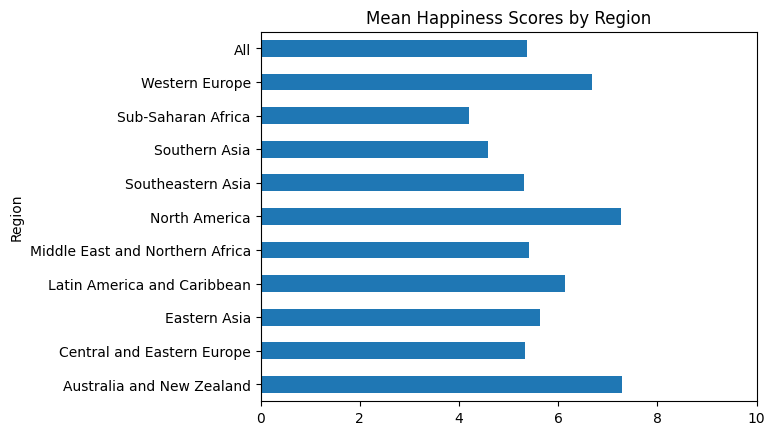

In [9]:
pv_happiness = happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean, margins=True)
pv_happiness.plot(kind='barh',xlim=(0,10),title='Mean Happiness Scores by Region',legend=False)
# An all column, but the bar doesn't follow any order like asec or sec

world_mean_happiness=happiness2015['Happiness Score'].mean()
# world_mean_happiness is 5.37573417721519 and value in all column is 5.375734

### 12. Aggregating Multiple Columns and Functions with Pivot Tables
The pivot_table method also allows us to aggregate multiple columns and apply multiple functions at once. Let's compare the results returned by the groupby operation and the pivot_table method.

1. Use the `df.groupby()` method to calculate the minimum, maximum, and mean family and happiness scores for each region in `happiness2015`.

2. Use the `pivot_table` method to return the same information, but also calculate the minimum, maximum, and mean for the entire `Family` and `Happiness Score` columns.

In [10]:
grouped=happiness2015.groupby('Region')['Happiness Score','Family']
happy_family_stats=grouped.agg([np.min,np.max,np.mean])

pv_happy_family_stats=happiness2015.pivot_table(['Happiness Score','Family'],'Region',margins=True,aggfunc=[np.min,np.max,np.mean])

C:\Users\eyuya\AppData\Local\Temp\ipykernel_2064\1642972722.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped=happiness2015.groupby('Region')['Happiness Score','Family']
